# Node2Vec部分

In [1]:
# 使用Node2Vec对seealsology-data进行压缩
import networkx as nx
import pandas as pd
import numpy as np
import random
from tqdm import tqdm
from sklearn.decomposition import PCA
from node2vec import Node2Vec
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# 数据加载，构造图
df = pd.read_csv('seealsology-data.tsv',sep='\t')
G = nx.from_pandas_edgelist(df,'source','target',edge_attr=True,create_using=nx.Graph())
print(len(G))

# 初始化Node2Vec模型
#model = DeepWalk(G, walk_length=10, num_walks=5, workers=1)
model = Node2Vec(G, walk_length = 10, num_walks = 5, p = 0.25, q = 4, workers = 1)
# 模型训练
result = model.fit(window=4, iter=20)

Computing transition probabilities:   9%|█████████                                                                                                | 208/2399 [00:00<00:01, 2044.66it/s]

2399


Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:05<00:00,  1.18s/it]


[('dna replication', 0.977043628692627), ('cell cycle', 0.9601132273674011), ('indirect dna damage', 0.9563082456588745), ('mutation research (journal)', 0.944058895111084), ('sidna', 0.9352773427963257), ('aging dna', 0.9313108325004578), ('human mitochondrial genetics', 0.9219895601272583), ('meiosis', 0.9168775677680969), ('dna repair', 0.9087452292442322), ('dna', 0.8994574546813965)]


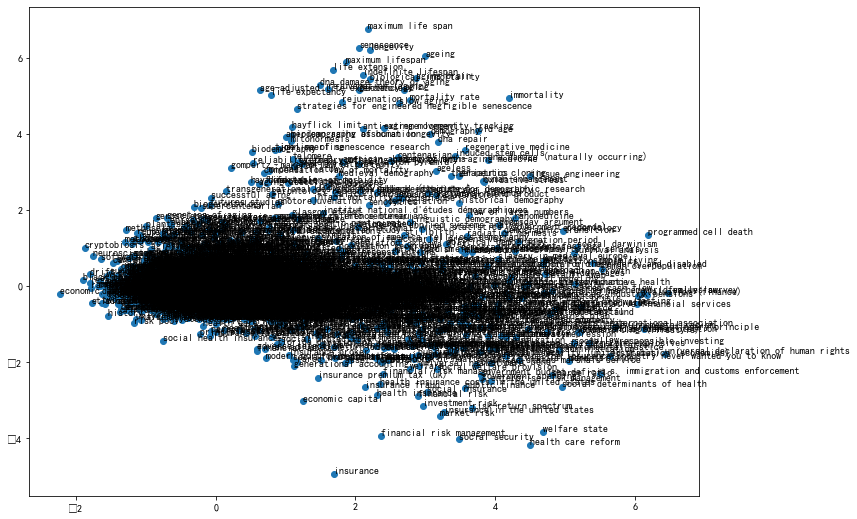

In [2]:
# 得到节点的embedding
print(result.wv.most_similar('direct dna damage'))
embeddings = result.wv
print(embeddings)

# 在二维空间中绘制所选节点的向量
def plot_nodes(word_list):
    # 每个节点的embedding为100维
    X = []
    for item in word_list:
        X.append(embeddings[item])
    #print(X.shape)
    # 将100维向量减少到2维
    pca = PCA(n_components=2)
    result = pca.fit_transform(X) 
    #print(result)
    # 绘制节点向量
    plt.figure(figsize=(12,9))
    # 创建一个散点图的投影
    plt.scatter(result[:, 0], result[:, 1])
    for i, word in enumerate(list(word_list)):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))        
    plt.show()
    
plot_nodes(result.wv.vocab)

# Deep Walk部分
需要从https://github.com/shenweichen/GraphEmbedding下载graphembedding.ge.models包才可以

In [5]:
help(model_d)

Help on DeepWalk in module graphembedding.ge.models.deepwalk object:

class DeepWalk(builtins.object)
 |  Methods defined here:
 |  
 |  __init__(self, graph, walk_length, num_walks, workers=1)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  get_embeddings(self)
 |  
 |  train(self, embed_size=128, window_size=5, workers=3, iter=5, **kwargs)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



In [6]:
from graphembedding.ge.models import DeepWalk
model_d = DeepWalk(G, walk_length=10, num_walks=5, workers=1)
# 模型训练
result_d = model_d.train(embed_size=128, window_size=5, workers=3, iter=5)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Learning embedding vectors...
Learning embedding vectors done!


[('dna replication', 0.9498457908630371), ('homologous recombination', 0.9219746589660645), ('reactive oxygen species', 0.9191726446151733), ('origin and function of meiosis', 0.9175263047218323), ('indirect dna damage', 0.9167641401290894), ('meiosis', 0.9135720133781433), ('free radical damage to dna', 0.9084376692771912), ('ap site', 0.9020566940307617), ('dna adduct', 0.9010734558105469), ('dna damage (naturally occurring)', 0.8967462778091431)]


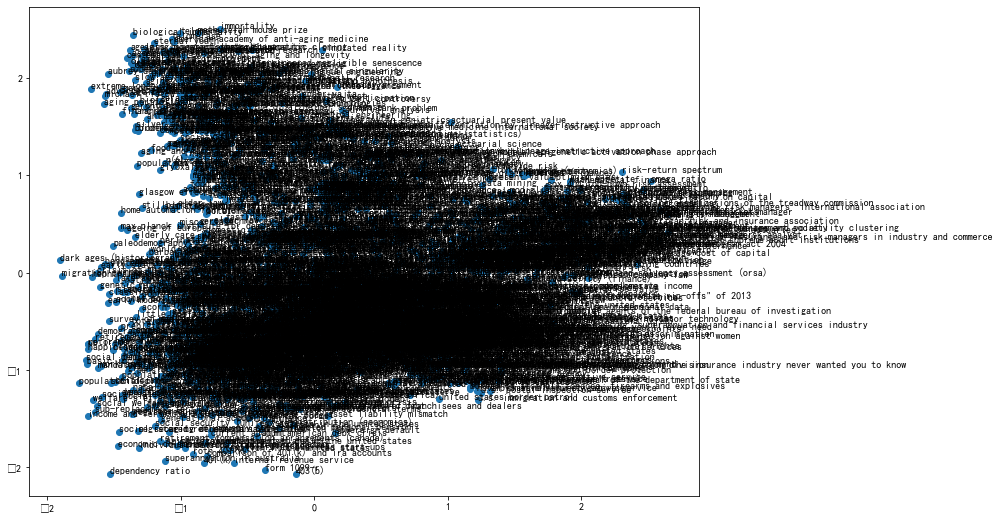

In [7]:
# 得到节点的embedding
print(result_d.wv.most_similar('direct dna damage'))
embeddings = result_d.wv
print(embeddings)

# 在二维空间中绘制所选节点的向量
def plot_nodes(word_list):
    # 每个节点的embedding为100维
    X = []
    for item in word_list:
        X.append(embeddings[item])
    #print(X.shape)
    # 将100维向量减少到2维
    pca = PCA(n_components=2)
    result = pca.fit_transform(X) 
    #print(result)
    # 绘制节点向量
    plt.figure(figsize=(12,9))
    # 创建一个散点图的投影
    plt.scatter(result[:, 0], result[:, 1])
    for i, word in enumerate(list(word_list)):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))        
    plt.show()
    
plot_nodes(result_d.wv.vocab)